# Tutorial 1: Getting Started with BrainEvent

Welcome to the BrainEvent tutorial series! This tutorial will introduce you to BrainEvent's core data structure - **BinaryArray**, and how to use it for efficient event-driven computation.

## 1. What is BinaryArray?

In neuroscience modeling, brain computation is performed through **discrete spike events**. These spike events are binary (0 or 1), indicating whether a neuron fires at a specific moment.

`BinaryArray`  is the core data structure provided by BrainEvent for representing these binary event arrays. After wrapping your data with `BinaryArray`, subsequent matrix operations will automatically leverage event-driven optimization algorithms, significantly improving computational efficiency.

### Core Advantages
- ✅ **Automatic Optimization**: Automatically leverage data sparsity for efficient computation
- ✅ **Hardware Acceleration**: Support for multiple hardware platforms including CPU, GPU, TPU
- ✅ **Seamless Integration**: Fully compatible with JAX/NumPy ecosystem
- ✅ **Physical Units**: Support for BrainUnit's unit-aware computation

## 2. Installation and Import

First, make sure you have BrainEvent installed:

In [ ]:
# Install BrainEvent
# !pip install brainevent -U

# Or install the complete BrainX ecosystem
# !pip install BrainX -U

In [53]:
import brainevent
import brainstate
import jax.numpy as jnp
import numpy as np
import jax

print(f"BrainEvent version: {brainevent.__version__}")
print(f"JAX version: {jax.__version__}")

BrainEvent version: 0.0.4
JAX version: 0.7.2


## 3. Creating BinaryArray

### 3.1 Creating from Regular Arrays

`BinaryArray` Can be created from NumPy arrays, JAX arrays, or Python lists:

In [54]:
# Create from list
event1 = brainevent.BinaryArray([1, 0, 1, 1, 0, 0, 1])
print("BinaryArray from list:")
print(event1)
print(f"Shape: {event1.shape}, dtype: {event1.dtype}")
print()

BinaryArray from list:
BinaryArray(value=Array([1, 0, 1, 1, 0, 0, 1]), dtype=int32)
Shape: (7,), dtype: int32



In [55]:
# Create from NumPy array
np_array = np.array([[1, 0, 1], [0, 1, 0]], dtype=bool)
event2 = brainevent.BinaryArray(np_array)
print("BinaryArray from NumPy array:")
print(event2)
print()

BinaryArray from NumPy array:
BinaryArray(value=Array([[ True, False,  True],
                         [False,  True, False]]),
            dtype=bool)



In [56]:
# Create from JAX array
jax_array = jnp.array([1, 1, 0, 1], dtype=bool)
event3 = brainevent.BinaryArray(jax_array)
print("BinaryArray from JAX array:")
print(event3)

BinaryArray from JAX array:
BinaryArray(value=Array([ True,  True, False,  True]), dtype=bool)


### 3.2 Simulating Neuron Spikes

In practical applications, `BinaryArray` typically used to represent neuron spike firing patterns:

In [57]:
# Simulate spike states of 10 neurons at a moment
# 1 indicates firing spike, 0 indicates resting
num_neurons = 10
spike_rate = 0.3  # 30%的神经元fired 

# Use brainstate.random to generate spike patterns
brainstate.random.seed(0)
spikes = brainstate.random.bernoulli(spike_rate, size=(num_neurons,))
spike_array = brainevent.BinaryArray(spikes)

print(f"Neuron spike pattern (firing rate={spike_rate}):")
print(spike_array)
print(f"Number of firing neurons: {spike_array.sum()}")

Neuron spike pattern (firing rate=0.3):
BinaryArray(value=Array([ True,  True, False, False,  True,  True,  True, False,  True,
                         False]),
            dtype=bool)
Number of firing neurons: 6


## 4. Basic Operations of BinaryArray

### 4.1 Access and Indexing

In [58]:
# Create a 2D BinaryArray
events_2d = brainevent.BinaryArray([
    [1, 0, 1, 0],
    [0, 1, 1, 0],
    [1, 1, 0, 1]
])

print("Original BinaryArray:")
print(events_2d)
print()

# Indexing operations
print("First row:", events_2d[0])
print("Second column:", events_2d[:, 1])
print("Submatrix:", events_2d[1:, :2])

Original BinaryArray:
BinaryArray(value=Array([[1, 0, 1, 0],
                         [0, 1, 1, 0],
                         [1, 1, 0, 1]]),
            dtype=int32)

First row: [1 0 1 0]
Second column: [0 1 1]
Submatrix: [[0 1]
 [1 1]]


### 4.2 Mathematical Operations

In [59]:
# Basic statistics
print("Total spikes:", events_2d.sum())
print("Spikes per row:", events_2d.sum(axis=1))
print("Spikes per column:", events_2d.sum(axis=0))
print()

# Logical operations
event_a = brainevent.BinaryArray([1, 0, 1, 0])
event_b = brainevent.BinaryArray([1, 1, 0, 0])

print("Event A:", event_a)
print("Event B:", event_b)
print("A AND B:", event_a & event_b)
print("A OR B:", event_a | event_b)

Total spikes: 7
Spikes per row: [2 2 3]
Spikes per column: [2 2 2 1]

Event A: BinaryArray(value=Array([1, 0, 1, 0]), dtype=int32)
Event B: BinaryArray(value=Array([1, 1, 0, 0]), dtype=int32)
A AND B: [1 0 0 0]
A OR B: [1 1 1 0]


## 5. Event-driven matrix multiplication

This is `BinaryArray`'s most powerful feature! When `BinaryArray` is multiplied with a matrix, BrainEvent automatically leverages event sparsity for optimization.

### 5.1 Multiplication with Dense Matrix

In [60]:
# Create BinaryArray (simulating presynaptic neuron spikes)
pre_spikes = brainevent.BinaryArray([1, 0, 1, 0, 1])  # 5 neurons

# Create weight matrix (5 presynaptic -> 3 postsynaptic)
weights = jnp.array([
    [0.5, 0.2, 0.1],  # neuron 0 -> post neurons
    [0.3, 0.4, 0.2],  # neuron 1 -> post neurons
    [0.1, 0.5, 0.3],  # neuron 2 -> post neurons
    [0.2, 0.1, 0.4],  # neuron 3 -> post neurons
    [0.4, 0.3, 0.5],  # neuron 4 -> post neurons
])

# Event-driven matrix multiplication
# Only neurons that fired spikes(索引0, 2, 4)corresponding rows participate in computation
post_input = pre_spikes @ weights

print("Presynaptic spikes:", pre_spikes)
print("Weight matrix shape:", weights.shape)
print("Postsynaptic input:", post_input)
print()
print("Explanation: Only neurons0, 2, 4fired spikes, so only these 3rows are computed for weighted sum")

Presynaptic spikes: BinaryArray(value=Array([1, 0, 1, 0, 1]), dtype=int32)
Weight matrix shape: (5, 3)
Postsynaptic input: [1.  1.  0.9]

Explanation: Only neurons0, 2, 4fired spikes, so only these 3rows are computed for weighted sum


### 5.2 Performance Comparison: BinaryArray vs Regular Array

Let's compare using `BinaryArray` and regular arrays in performance:

In [61]:
import time

# Large-scale network parameters
n_pre = 10000   # Number of presynaptic neurons
n_post = 5000   # Number of postsynaptic neurons
spike_rate = 0.05  # 5% firing rate (sparse spikes)

# Set random seed for reproducibility
brainstate.random.seed(42)

# Generate sparse spikes
spikes_bool = brainstate.random.bernoulli(spike_rate, size=(n_pre,))

# Generate weight matrix
weights = brainstate.random.normal(size=(n_pre, n_post)) * 0.1

# Method 1: Using BinaryArray (event-driven)
event_spikes = brainevent.BinaryArray(spikes_bool)

# Method 2: Using regular array
normal_spikes = spikes_bool.astype(jnp.float32)

# Warmup and compilation
_ = jax.block_until_ready(event_spikes @ weights)
_ = jax.block_until_ready(normal_spikes @ weights)

# Performance test
n_trials = 100

# BinaryArray method
start = time.time()
for _ in range(n_trials):
    result_event = jax.block_until_ready(event_spikes @ weights)
event_time = (time.time() - start) / n_trials

# Regular array method
start = time.time()
for _ in range(n_trials):
    result_normal = jax.block_until_ready(normal_spikes @ weights)
normal_time = (time.time() - start) / n_trials

print(f"Network size: {n_pre} -> {n_post} neurons")
print(f"Spike firing rate: {spike_rate*100}%")
print(f"Actual firing count: {spikes_bool.sum()}")
print()
print(f"BinaryArray time: {event_time*1000:.3f} ms")
print(f"Regular array time: {normal_time*1000:.3f} ms")
print(f"Speedup: {normal_time/event_time:.2f}x")
print()
print("Result consistency check:", jnp.allclose(result_event, result_normal))

Network size: 10000 -> 5000 neurons
Spike firing rate: 5.0%
Actual firing count: 516

BinaryArray time: 0.685 ms
Regular array time: 3.768 ms
Speedup: 5.50x

Result consistency check: True


## 6. Practical Application Example: Feedforward Network

Let's build a simple two-layer feedforward spiking neural network:

In [62]:
class SimpleSpikingNetwork:
    """Simple two-layer spiking neural network"""
    
    def __init__(self, n_input, n_hidden, n_output, seed=0):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        
        # Initialize weights - using brainstate.random
        brainstate.random.seed(seed)
        self.w1 = brainstate.random.normal(size=(n_input, n_hidden)) * 0.1
        self.w2 = brainstate.random.normal(size=(n_hidden, n_output)) * 0.1
    
    def forward(self, input_spikes):
        """Forward propagation
        
        Args:
            input_spikes: BinaryArray，Input layer spikes
        
        Returns:
            Output layer activity values
        """
        # First layer: Input -> Hidden
        hidden_input = input_spikes @ self.w1
        
        # Hidden layer neurons: simple threshold activation
        threshold = 0.5
        hidden_spikes = brainevent.BinaryArray(hidden_input > threshold)
        
        # Second layer: Hidden -> Output
        output = hidden_spikes @ self.w2
        
        return output, hidden_spikes

# Create network
network = SimpleSpikingNetwork(n_input=20, n_hidden=10, n_output=5, seed=123)

# Generate input spikes
brainstate.random.seed(456)
input_pattern = brainstate.random.bernoulli(0.3, size=(20,))
input_events = brainevent.BinaryArray(input_pattern)

# Forward propagation
output, hidden_spikes = network.forward(input_events)

print("Input layer spikes:", input_events)
print(f"Input layer firing count: {input_events.sum()}/20")
print()
print("Hidden layer spikes:", hidden_spikes)
print(f"Hidden layer firing count: {hidden_spikes.sum()}/10")
print()
print("Output layer activity:")
print(output)
print(f"Output neuron with strongest response: {jnp.argmax(output)}")

Input layer spikes: BinaryArray(value=Array([False, False,  True, False, False,  True, False, False, False,
                         False,  True, False, False,  True,  True, False, False,  True,
                         False,  True]),
            dtype=bool)
Input layer firing count: 7/20

Hidden layer spikes: BinaryArray(value=Array([False, False, False, False, False, False, False, False, False,
                         False]),
            dtype=bool)
Hidden layer firing count: 0/10

Output layer activity:
[0. 0. 0. 0. 0.]
Output neuron with strongest response: 0


## 7. Time Series Spike Patterns

In actual neural network simulations, we typically need to process time series spike data:

In [63]:
# Simulate 100 time steps, each step has 50 neurons
n_steps = 100
n_neurons = 50
spike_rate = 0.1

# Generate time series spikes
brainstate.random.seed(999)
spike_trains = brainstate.random.bernoulli(spike_rate, size=(n_steps, n_neurons))

# Create BinaryArray for each time step and compute network output
brainstate.random.seed(0)
weights = brainstate.random.normal(size=(n_neurons, 10)) * 0.1

outputs = []
for t in range(n_steps):
    spikes_t = brainevent.BinaryArray(spike_trains[t])
    output_t = spikes_t @ weights
    outputs.append(output_t)

outputs = jnp.stack(outputs)

print(f"Time series length: {n_steps} steps")
print(f"Neurons per step: {n_neurons}")
print(f"Output shape: {outputs.shape}")
print()
print(f"Total spikes: {spike_trains.sum()}")
print(f"Average spikes per step: {spike_trains.sum(axis=1).mean():.1f}")
print(f"Average firing rate per neuron: {spike_trains.mean():.3f}")

Time series length: 100 steps
Neurons per step: 50
Output shape: (100, 10)

Total spikes: 503
Average spikes per step: 5.0
Average firing rate per neuron: 0.101


## 8. Visualizing Spike Patterns

Let's use `braintools` to visualize neuron spike firing patterns (raster plot):

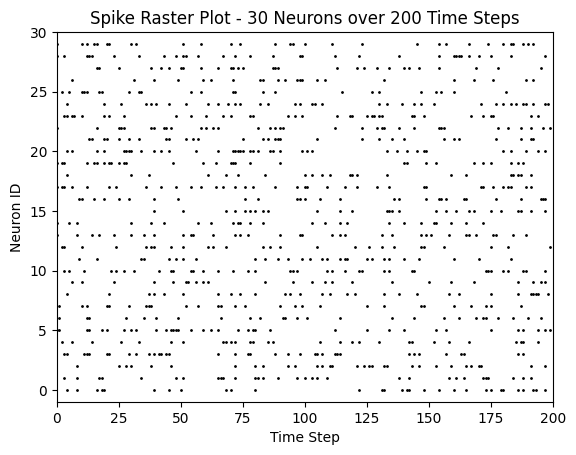

Total spikes: 904
Average firing rate: 0.151
Most active neuron: 20, fired 39 times


In [64]:
import braintools

# Generate spike patterns
n_steps = 200
n_neurons = 30

brainstate.random.seed(456)
spike_trains = brainstate.random.bernoulli(0.15, size=(n_steps, n_neurons))

# Use braintools.visualize.raster_plot to draw raster plot
ts = np.arange(n_steps)

braintools.visualize.raster_plot(
    ts,
    spike_trains,
    markersize=4,
    xlabel='Time Step',
    ylabel='Neuron ID',
    title='Spike Raster Plot - 30 Neurons over 200 Time Steps',
    xlim=(0, n_steps),
    ylim=(-1, n_neurons),
    show=True
)

# Statistics
print(f"Total spikes: {spike_trains.sum()}")
print(f"Average firing rate: {spike_trains.mean():.3f}")
print(f"Most active neuron: {spike_trains.sum(axis=0).argmax()}, fired {spike_trains.sum(axis=0).max()} times")

## 9. Summary

In this tutorial, we learned:

1. ✅ **BinaryArray Concept**: Core data structure for representing binary spike events
2. ✅ **Creating BinaryArray**: Creating from lists, NumPy arrays, JAX arrays
3. ✅ **Basic Operations**: Indexing, statistics, logical operations
4. ✅ **Event-driven Computation**: Leveraging sparsity to optimize matrix multiplication
5. ✅ **Performance Advantages**: BinaryArray's acceleration effect in sparse spike scenarios
6. ✅ **Practical Applications**: Building simple spiking neural networks
7. ✅ **Time Series Processing**: Processing multi-step time series spike data
8. ✅ **Visualization**: Using braintools to draw spike raster plots

## Next steps

In the next tutorial, we will dive deeper into:
- 📚 **Tutorial 2**: Sparse Data Structures - CSR, COO, CSC
- Learn how to use different sparse matrix formats to represent neural network connections
- Learn how to choose appropriate data structures for optimal performance

## References

- 💻 [GitHubRepository](https://github.com/chaobrain/brainevent)
- 🌐 [Brain modeling ecosystem](https://brainmodeling.readthedocs.io/)